In [5]:
import holoviews as hv
import panel as pn
import param
import pandas as pd
import umap
from bokeh.models import BoxSelectTool, BoxZoomTool, ResetTool, TapTool, SaveTool, PanTool, WheelZoomTool
from sklearn import decomposition, manifold
from sklearn.preprocessing import MinMaxScaler

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import panel as pn
pn.extension('tabulator') # Interactive tables

import hvplot.pandas # Interactive dataframes

In [65]:
df = pd.read_csv("data\StudentsPerformance.csv")

## Data Exploration

In [14]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [66]:
df.insert(0,'id',df.index)

In [68]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93


In [67]:
df.shape

(1000, 9)

In [69]:
df.columns

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [70]:
numeric_features = ['math score', 'reading score', 'writing score']
categoric_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

### Description uivariée

In [71]:
# Description of numeric data
df[numeric_features].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [72]:
df.isnull().sum()

id                             0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataframe

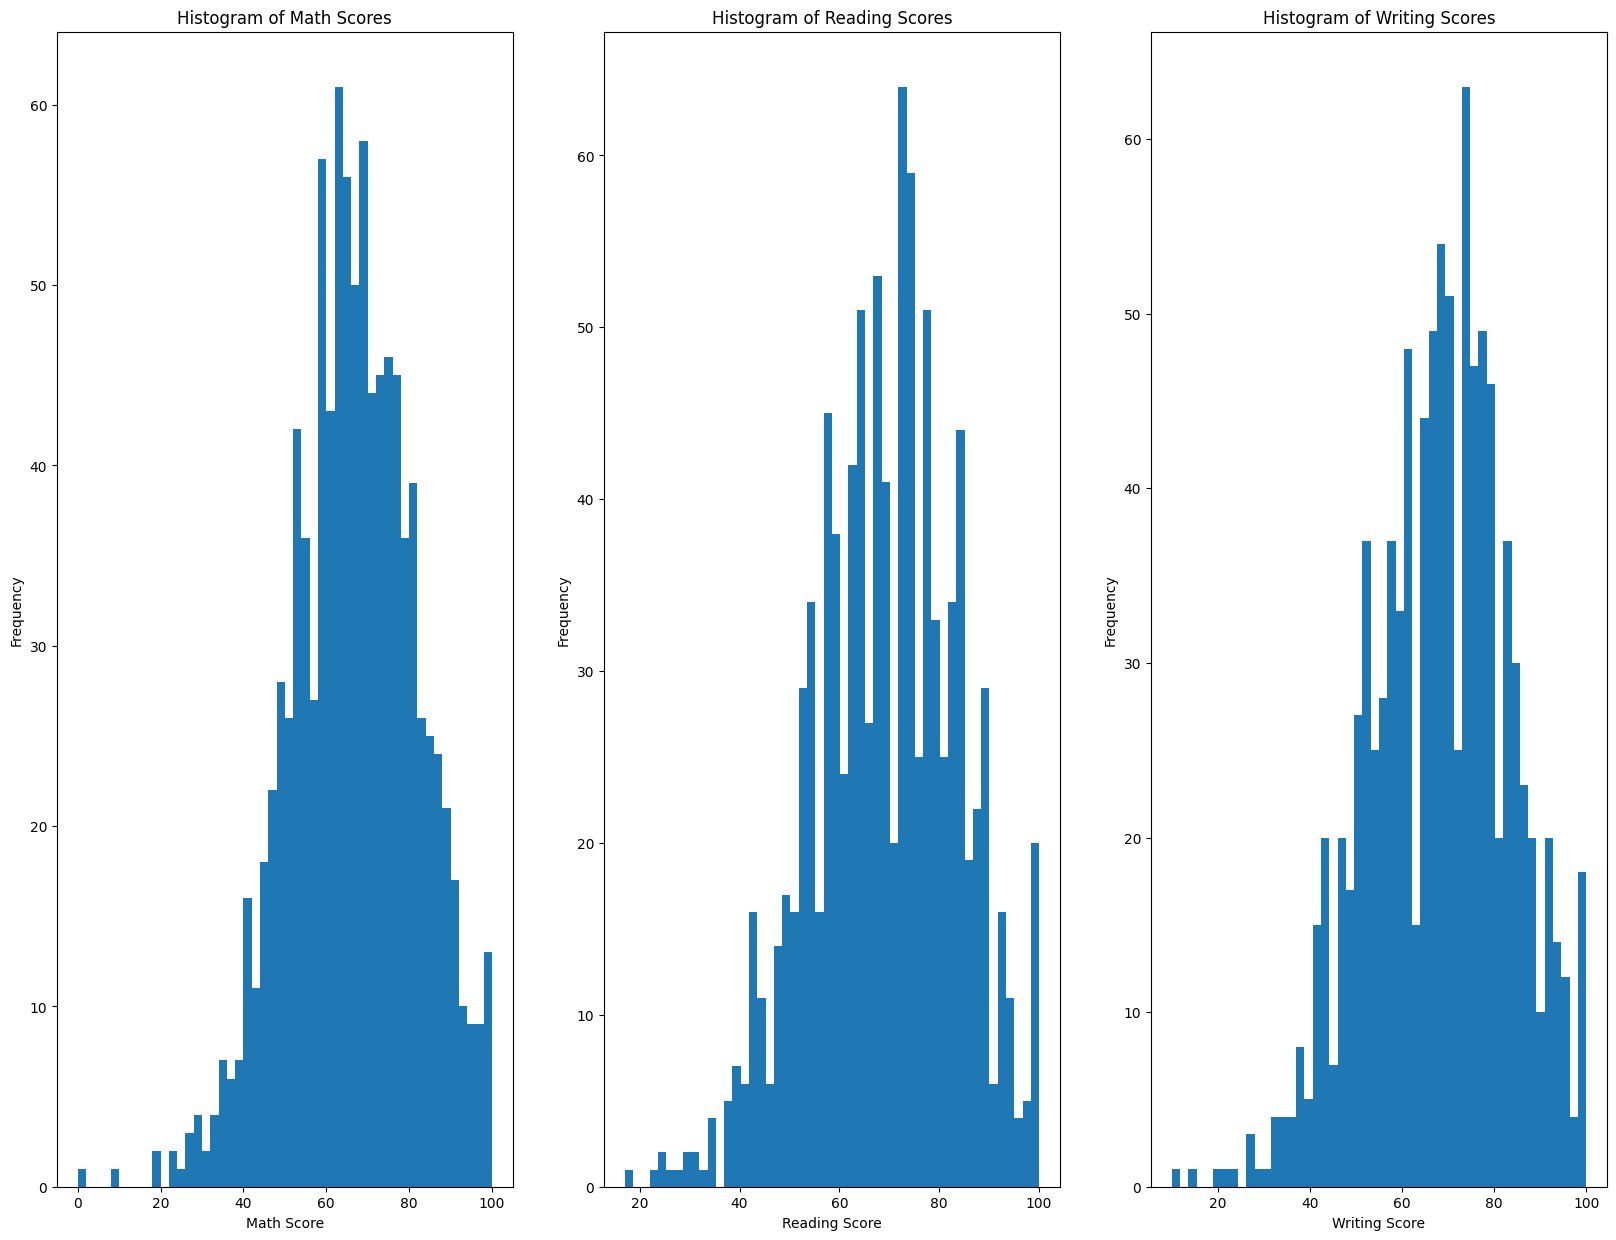

In [73]:
ex_fig = plt.figure(figsize=(20, 15))
gridsize = (1, 3)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)

# Plot histograms of each feature on the subplots
df[numeric_features[0]].plot.hist(bins=50, ax=ax1)
df[numeric_features[1]].plot.hist(bins=50, ax=ax2)
df[numeric_features[2]].plot.hist(bins=50, ax=ax3)

# Add axis labels and a title to each subplot
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Math Scores')

ax2.set_xlabel('Reading Score')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Reading Scores')

ax3.set_xlabel('Writing Score')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Writing Scores')

# Display the plot
plt.show()


Les données semblent avoir une distribution normale. Il semblerait qu'il y ait un gros pic de personne qui reussisent à obtenir entre 60 et 70 pour les maths, 70 et 80 pour le reading et le writing

### Description bivariée

In [74]:
def boxplot_quali_quanti(quali, quanti, df):
    """
    plot a boxplot between categorical et numerical variable
    --------------------------------------------------------
    quali -> array of string. example ['diplome', 'sexe']
    quanti -> string. example "salaire"
    df -> DataFrame
    """
    for column in quali:
        data = pd.concat([df[quanti], df[column]], axis=1)
        f, ax = plt.subplots(figsize=(8, 6))
        # Order
        order = df.groupby(by=[column])[quanti].mean().sort_values(ascending=False).iloc[::-1].index
        # Plot
        fig = sns.boxplot(x=column, y=quanti, data=data, order=order)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.xlabel(column, fontsize=20)
        plt.ylabel(quanti, fontsize=20)
        
        
def mean_quali_quanti(quali, quanti, df):
    """
    display mean of quantitative for each category of the variable qualitative
    --------------------------------------------------------------------------
    quali -> array of string. example ['diplome', 'sexe']
    quanti -> string. example "salaire"
    df -> DataFrame
    """
    for column in quali:
        print('average')
        print(df.groupby([column])[quanti].mean().sort_values(ascending=False))
        print('')

In [75]:
# Plotting Categorical Features
def plotting_categorical(nominal_features,  target_name, data, order=None):
    """
    plot a countplot between two categorical variables
    --------------------------------------------------------------------------
    nominal_features -> array of string. example ['sexe', 'diplome']
    target_name -> string. example "embauche"
    data -> DataFrame
    """
    for column in nominal_features:
        # Figure initiation
        fig = plt.figure(figsize=(18,8))

        # Number of occurrences per categoty - target pair
        ax = sns.countplot(x=column, hue=target_name, order=order, data=data, ax = plt.subplot(211));
        
        # X-axis Label
        plt.xlabel(column, fontsize=12);
        plt.xticks(size=20)
        plt.yticks(size=20)

        # Y-axis Label
        plt.ylabel('Nombre d occurence', fontsize=12);
        # Adding Super Title (One for a whole figure)
        plt.suptitle('Graphique '+column + '/'+ target_name, fontsize=18);
        # Setting Legend location 
        plt.legend(loc=1, prop={'size': 14} );

In [76]:
df.head(3)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93


#### Score X Gender

Let's see the sex distribution in our data

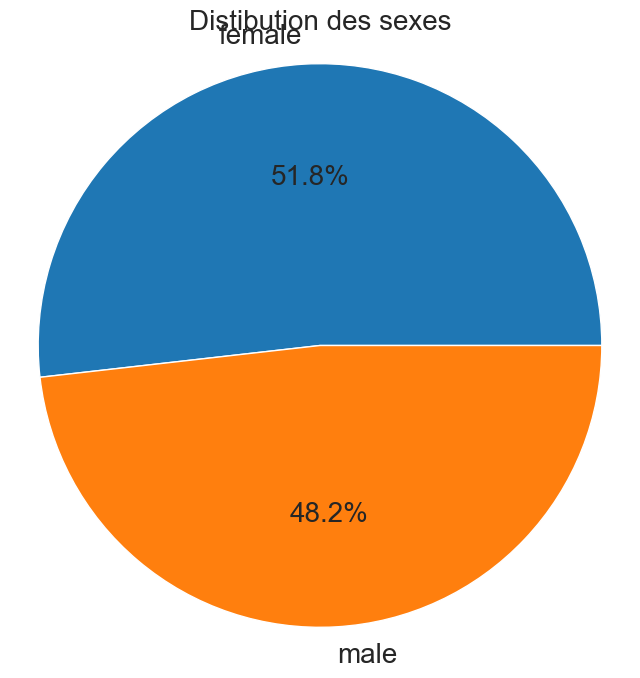

In [85]:
count_gender = df.groupby('gender')['id'].nunique()
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.pie(count_gender,  labels=count_gender.index,  autopct='%1.1f%%', startangle=0, textprops={'fontsize': 20})
plt.axis('equal')
plt.title('Distibution des sexes', size=20)
plt.show()

##### Maths score X Gender

average
gender
male      68.728216
female    63.633205
Name: math score, dtype: float64



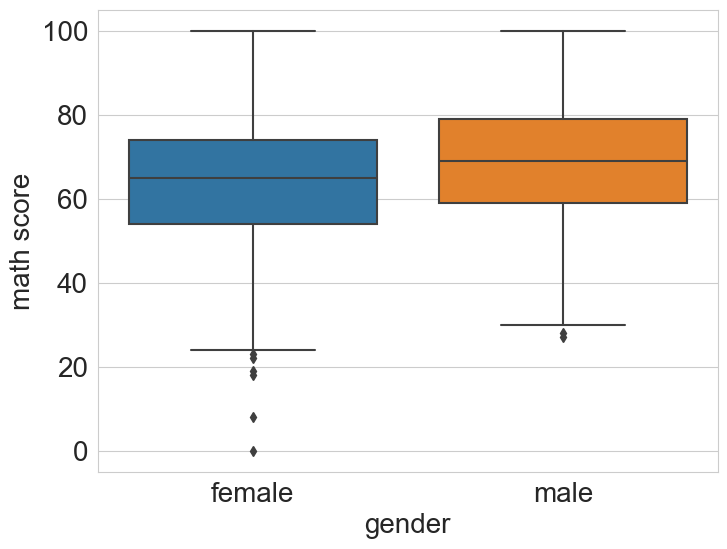

In [83]:
# Répartition des scores de maths par rapport au sexe 
boxplot_quali_quanti(["gender"], "math score", df)
mean_quali_quanti(["gender"], "math score", df)

Il semblerait que les hommes ont des meilleurs scores en maths que les femmes.

#### Reading score X Gender

average
gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64



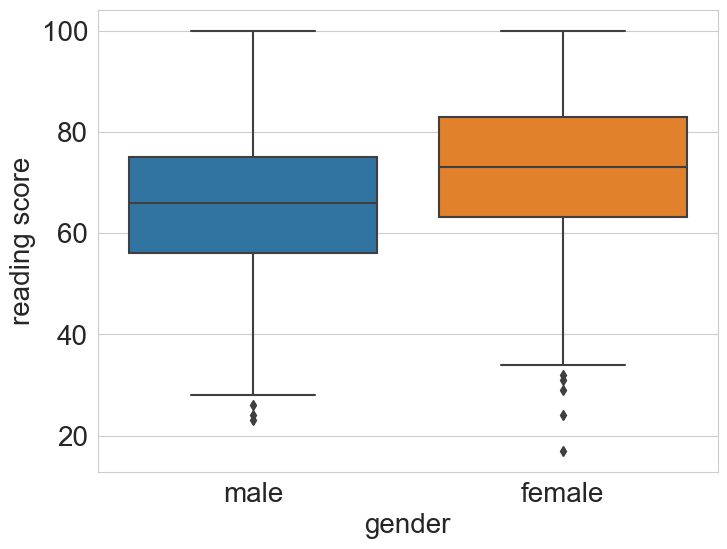

In [88]:
# Répartition des scores de maths par rapport au sexe 
boxplot_quali_quanti(["gender"], "reading score", df)
mean_quali_quanti(["gender"], "reading score", df)

Il semblerait que les femmes ont des meilleurs scores en lecture que les hommes.

#### Writing score X Gender

average
gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64



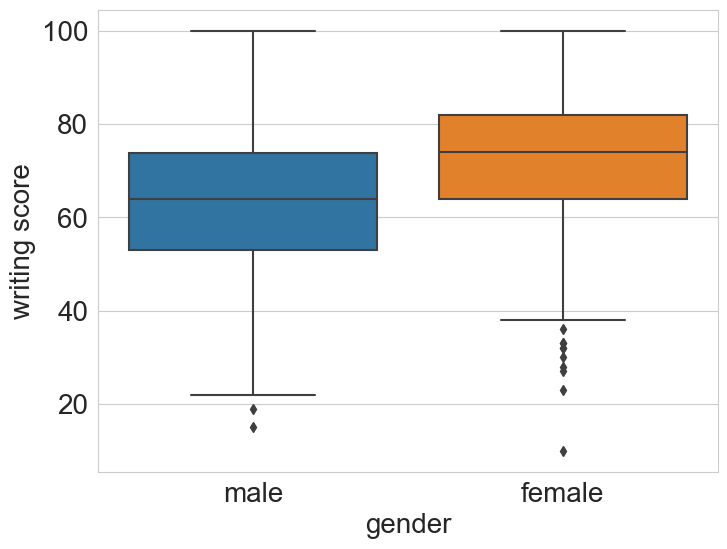

In [90]:
# Répartition des scores de maths par rapport au sexe 
boxplot_quali_quanti(["gender"], "writing score", df)
mean_quali_quanti(["gender"], "writing score", df)

Il semblerait que les femmes ont des meilleurs scores en écriture que les hommes.

**Conclusion**:

Si on est une femme, on a plus de chance de réussir aux examens de littérature

Si on est un homme, on a plus de chance de réussir aux examens de mathématiques